# Introduction

This is an introductory notebook to introduce the use of jupyter notebook for computational economics.

The notebook has text sections (like this one !), data setup sections, code sections and code output sections (for displaying tables and graphs)

The code section will typically have the comp eco model that we want to use. The data section will have some sample data and the config parameter values.
The output section will have the graphs plotted using the code.

You will be required to tweak the data or parameters and run the code for yourself to understand how the model works. Emphasis will be on interpreting the tables and graphs produced and relating the values there to the input data and config parameters.

Those of you who are python trained could also modify the model where required.

# Evolution example

*   A creature C evolves along a straight grassy path (depicted as a linear array of 100 cells).
*  In the beginning, there is only one C located at a cell n somewhere on the path.
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
* There is no grass at the cell where C has been (because C has eaten it).
* In each period, C divides into two, and each copy (also labeled C) locates itself randomly on the path.
* If two Cs collide at a cell, one of them dies.
* If a C lands at a cell with no grass, it dies.

State of the path after one evolution period:
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxCxx_xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

How many creatures will be there after N time periods?





In [6]:
from random import randrange
from matplotlib import pyplot as plt

In [7]:
size = 100
numSteps = 100


In [8]:
def ev1_step(cells, step):

  size = len(cells)

  numc = cells.count('C')
  if numc == 0:
    return 0

  for i in range(size):
    if cells[i] == 'C':
      cells[i] = '_'

  for k in range(2*numc):
      p = randrange(0,size)
      if cells[p] == 'x':
        cells[p] = 'C'

  return cells.count('C')
  # returns the number of creatures


In [9]:
def evolve(do_step):
  cells = ['x' for i in range(size)]
  cells[randrange(0,size)] = 'C'

  step = 0
  print("".join(cells), step)

  y1 = []
  y2 = []

  while do_step(cells,step) > 0 and step < numSteps:
    step += 1
    print("".join(cells), step)
    y1.append(cells.count('x'))
    y2.append(cells.count('C'))

  evolve_plot(y1, y2, 'period', 'grass count', 'creature count')

In [10]:
def evolve_plot(y1, y2, xlabel, y1label, y2label):
  fig,ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax1.plot(y1, linestyle = 'dotted', color='r')
  ax2.plot(y2, linestyle = 'dashed', color='b')
  ax1.set_xlabel(xlabel)
  ax1.set_ylabel(y1label, color='r')
  ax2.set_ylabel(y2label, color='b')
  plt.show()

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCxxxxxxxxxxxxxxxxxxxxxxxxxxx 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxCxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCxxxxxxxxxxxx_xxxxxxxxxxxxxxxxxxxxxxxxxxx 1
xCxxxxxxxxCxxxxxxxxxxxxxxxx_xxxxxxxxxxxxxxxxxxxxxxxxxCxxxxx_xxxxxxxxxxxx_xxxxxxxxxxxCxxxxxxxxxxxxxxx 2
x_xxxxxxxx_xxxxxxxxxxxxxCxx_xxxxxxxCxxxxxxxxxxCxxxxxx_Cxxxx_xxxxxxCxxxxx_xxxxxCxxxxx_xxxxxxxxxxxxxxx 3
x_CxxxCxCx_xxxxxxxxxxxxC_xC_Cxxxxxx_xxxxxxxxxx_Cxxxxx__xxxx_xxxxxx_Cxxxx_xxxCx_xxxxx_xxxxxxxxxxxxxxC 4
x__xxx_x_x_xxxxxxCCxxxx__x___xxCxxx_xxxxxxxxxx__xxCCx__CxCx_xxxxxx__CxCx_xxx_x_xxCxx_xxxCxxxxxxxCCC_ 5
x__xxC_x_x_xxCxxx__xxxx__x___xx_xxC_CxxCxxCxxx__xx__C___x_x_xxCCxC___x_x_xxC_C_xC_xx_xCC_xCCxxxx____ 6
x__xx__C_x_Cx_xxx__xxxC__x___CC_xx___Cx_Cx_xxx__xx______x_C_xx__x____x_x_xx____C__CC_x___x__xxxx____ 7
x__xC____x__C_xxx__Cxx___C______Cx____x__x_xCx__xx______x___xC__x____C_x_xx__________x___C__xxxx____ 8
x__x_____x____xxx___xx___________x____x__x_x_x__xx______x___x___x______x_

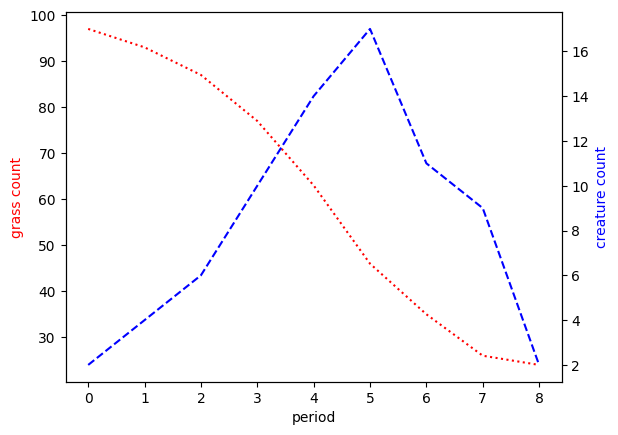

In [11]:
evolve(ev1_step)

## What if the grass could regenerate?
* We can try constant regeneration in each step
* ... and increase in regeneration rate with increasing steps

In [12]:
def regen(cells, n):
  if n < 1:
    return

  numb = cells.count('_')
  m = min(numb,n)

  k = 0
  while k < m:
    p = randrange(0,size)
    if cells[p] == '_':
      cells[p] = 'x'
      k += 1

In [13]:
regenFrac = 0.3

In [14]:
def ev2_step(cells, step):

  numc = cells.count('C')
  if numc == 0:
    return 0

  for i in range(size):
    if cells[i] == 'C':
      cells[i] = '_'

  for k in range(2*numc):
      p = randrange(0,size)
      if cells[p] == 'x':
        cells[p] = 'C'

  regen(cells, regenFrac*step)

  return cells.count('C')
  # returns the number of creatures

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCxxx 0
xxxxxxxxxxxxxxxxxxxxxxxxxCxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCxxxxxxxxxxxxxxxxxxxxxxxxxxxxx_xxx 1
xxxxxxxxxxxxxxxxxxxxxxxxx_xxxxxCxxxxxxxxxxxxxxxxxxxxxxxxxxxxCxxxxC_xxxxxxxxxxCxxxxxxxxxxxxxxxxxx_xxx 2
xCxxxxxxxxxxxxxxxxxxxxxxx_xxxxx_xxxxxxxxxxxxxxxxxCxxxxxxxxCx_xxxx__xxxxxxxxxx_xxxxxxxxxxxCCxxxCx_xxx 3
x_Cxxxxxxxxxxxxxxxxxxxxxx_xxxxx_xxxxCxxxxxxxxxxxx_xCxxxxxx_x_CxCC__xxCxxxxxxx_xCxxxxxxCxC__xxx_x_xxx 4
C__xxCxxxxCxxxCxxxxxxxxxx_xxxxx_xCxxxxCxxxxxxxxCx_x_xxxxxx_x__x____Cx_xCCxxCx_C_CxCxCx_x___xxxxx_xxC 5
___Cx_xxxx_CCx_xCxCxxxCxx_xxxCC_x_xxxx_xCCCxCCx_x_x_xxCxxx_x__C___x_x_x__xx_x____x_C_Cxx___CxxCx_xx_ 6
____C_xxxx___C_x_x_xCx_xC_CCx___C_xxxx_x___C__C_x_C_xC_xxx_C______xxx_x__xC_C____x____xx____xC_xxxx_ 7
______Cxxx_____x_x_x_C_C____x_____xxCC_C__x_____x___x__xxx_x______xxC_x__x_______x____Cx_x__C__xxxC_ 8
_______Cxx_____x_x_C________x_x___CC__x___x_____x___x__xxx_x______xCx_x__

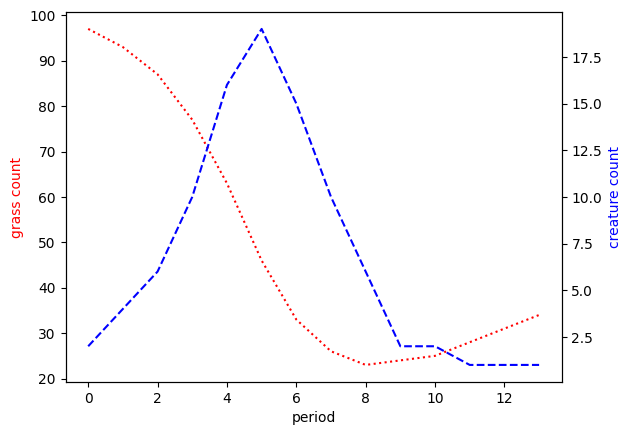

In [15]:
evolve(ev2_step)

## Limit the distance to which the creature can travel in one step

In each period, C divides into two, and each copy (also labeled C) locates itself randomly on either side of its current location, **within a distance limit**.

**No regeneration**

In [16]:
dlimit = 5

In [17]:
def ev3_step(cells, step):

  if cells.count('C') == 0:
    return 0

  ccells = cells.copy()

  for i in range(0,size):
    if ccells[i] == 'C':
      cells[i] = '_'
      if i < size-dlimit:
        p = randrange(i+1,i+dlimit)
        if ccells[p] == 'x':
          cells[p] = 'C'
      if i > dlimit:
        p = randrange(i-dlimit,i)
        if ccells[p] == 'x':
          cells[p] = 'C'

  #regen(cells, regenFrac*step)

  return cells.count('C')
  # returns the number of creatures

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxC_xxxCxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 1
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCxx__Cxx_xCxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 2
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCxxxx_xC___xx_C_Cxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 3
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCx_CCxx_x____xx____Cxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 4
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCCx_C___CC_x____xx_____xCxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 5
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCCxx__C________C____xx_____C_xCxxxxxxxxxxxxxxxxxxxxxxxxxxxx 6
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCx__Cx________________xx_______x_Cxxxxxxxxxxxxxxxxxxxxxxxxxxx 7
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCx_x___x________________xx_______x__Cxxxxxxxxxxxxxxxxxxxxxxxxxx 8
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCxxxx_x_x___x________________xx_______x__

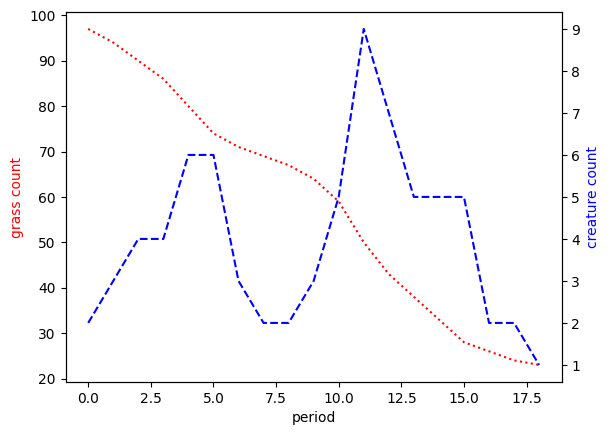

In [18]:
evolve(ev3_step)